In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file 
dataset=pd.read_csv('Documents/Tokyo Medals 2021.csv')
dataset.head(5)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3


In [3]:
dataset.columns

Index(['Country', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total',
       'Rank By Total'],
      dtype='object')

In [4]:
#Sorting by rank 
dataset=dataset.sort_values(by =['Rank By Total'], ascending=True)
dataset['Country']=dataset['Country'].replace({"United States of America": "USA", "People's Republic of China": "China"})
dataset.head(10)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,USA,39,41,33,113,1
1,China,38,32,18,88,2
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
2,Japan,27,14,17,58,5
5,Australia,17,7,22,46,6
9,Italy,10,10,20,40,7
8,Germany,10,11,16,37,8
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10


In [5]:
dataset.shape

(93, 6)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        93 non-null     object
 1   Gold Medal     93 non-null     int64 
 2   Silver Medal   93 non-null     int64 
 3   Bronze Medal   93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank By Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 5.1+ KB


In [7]:
dataset.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


In [8]:
dataset.isnull().sum()

Country          0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank By Total    0
dtype: int64

In [9]:
dataset['Country'].unique()

array(['USA', 'China', 'ROC', 'Great Britain', 'Japan', 'Australia',
       'Italy', 'Germany', 'Netherlands', 'France', 'Canada', 'Brazil',
       'Republic of Korea', 'Hungary', 'New Zealand', 'Ukraine', 'Spain',
       'Cuba', 'Poland', 'Switzerland', 'Turkey', 'Chinese Taipei',
       'Czech Republic', 'Denmark', 'Kenya', 'Jamaica', 'Sweden',
       'Serbia', 'Kazakhstan', 'Georgia', 'Croatia', 'Norway',
       'Azerbaijan', 'India', 'Belarus', 'Austria',
       'Islamic Republic of Iran', 'Belgium', 'Egypt', 'Bulgaria',
       'Hong Kong, China', 'Dominican Republic', 'Slovenia', 'Colombia',
       'Indonesia', 'Uzbekistan', 'Mongolia', 'Armenia', 'Portugal',
       'Ethiopia', 'Mexico', 'Venezuela', 'Slovakia', 'Philippines',
       'Greece', 'Romania', 'Uganda', 'Ireland', 'Israel', 'South Africa',
       'Argentina', 'Ecuador', 'Kyrgyzstan', 'Qatar', 'San Marino',
       'Bahamas', 'Finland', 'Nigeria', 'Malaysia', 'Tunisia', 'Estonia',
       'Jordan', 'Latvia', 'Thailand', 'F

Text(0.5, 1.0, 'Donut Chart for top 10 Countries')

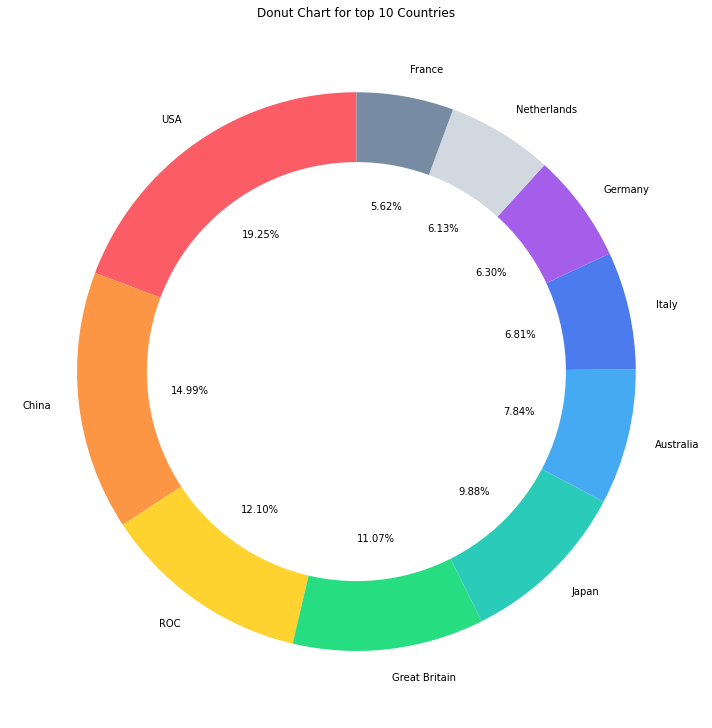

In [10]:
#top10countries
top10countries=dataset['Country'][:10]
top10medals=dataset['Total'][:10]
color=['#fc5c65','#fd9644','#fed330','#26de81','#2bcbba','#45aaf2','#4b7bec','#a55eea','#d1d8e0','#778ca3']

plt.figure(figsize=(12, 10))
plt.pie(top10medals, labels=top10countries, autopct='%1.2f%%', colors=color, startangle=90)

draw_circle=plt.Circle((0,0), 0.75, fc='white')
a=plt.gcf()
a.gca().add_artist(draw_circle)

plt.tight_layout()
plt.title('Donut Chart for top 10 Countries')

In [11]:
#India's Countibution
India_data=dataset.loc[dataset['Country']=='India']
India_data

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
47,India,1,2,4,7,33


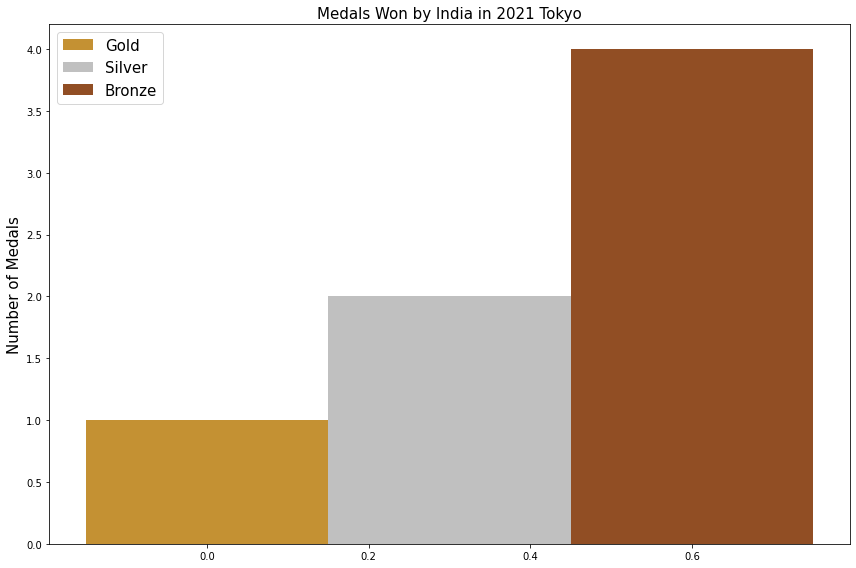

In [12]:
fig,axis=plt.subplots(figsize=(12,8))
width=0.3
i=np.arange(1)

axis.bar(i, India_data['Gold Medal'], data=India_data, width=width, label='Gold', color='#C49133')
axis.bar(i+width, India_data['Silver Medal'], data=India_data, width=width, label='Silver', color='#C0C0C0')
axis.bar(i+2*width, India_data['Bronze Medal'], data=India_data, width=width, label='Bronze', color='#914E24')
plt.legend(fontsize=15)
plt.title('Medals Won by India in 2021 Tokyo', fontsize=15)
plt.ylabel('Number of Medals', fontsize=15)
plt.tight_layout()

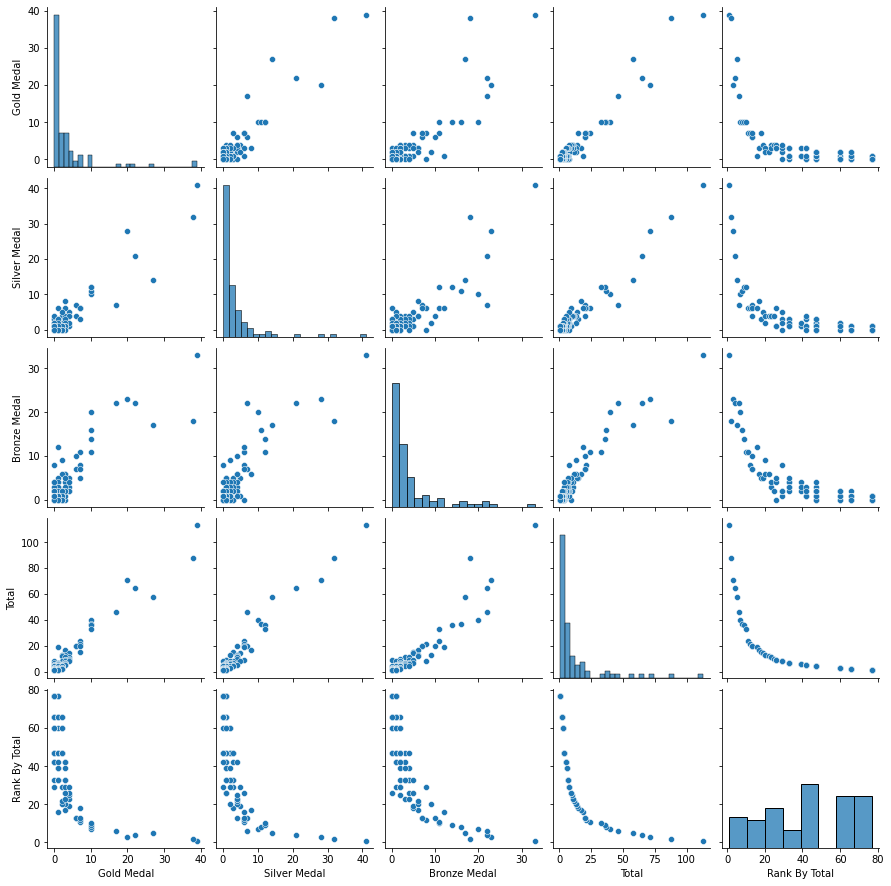

In [13]:
#Winners Distribution
sns.pairplot(dataset)

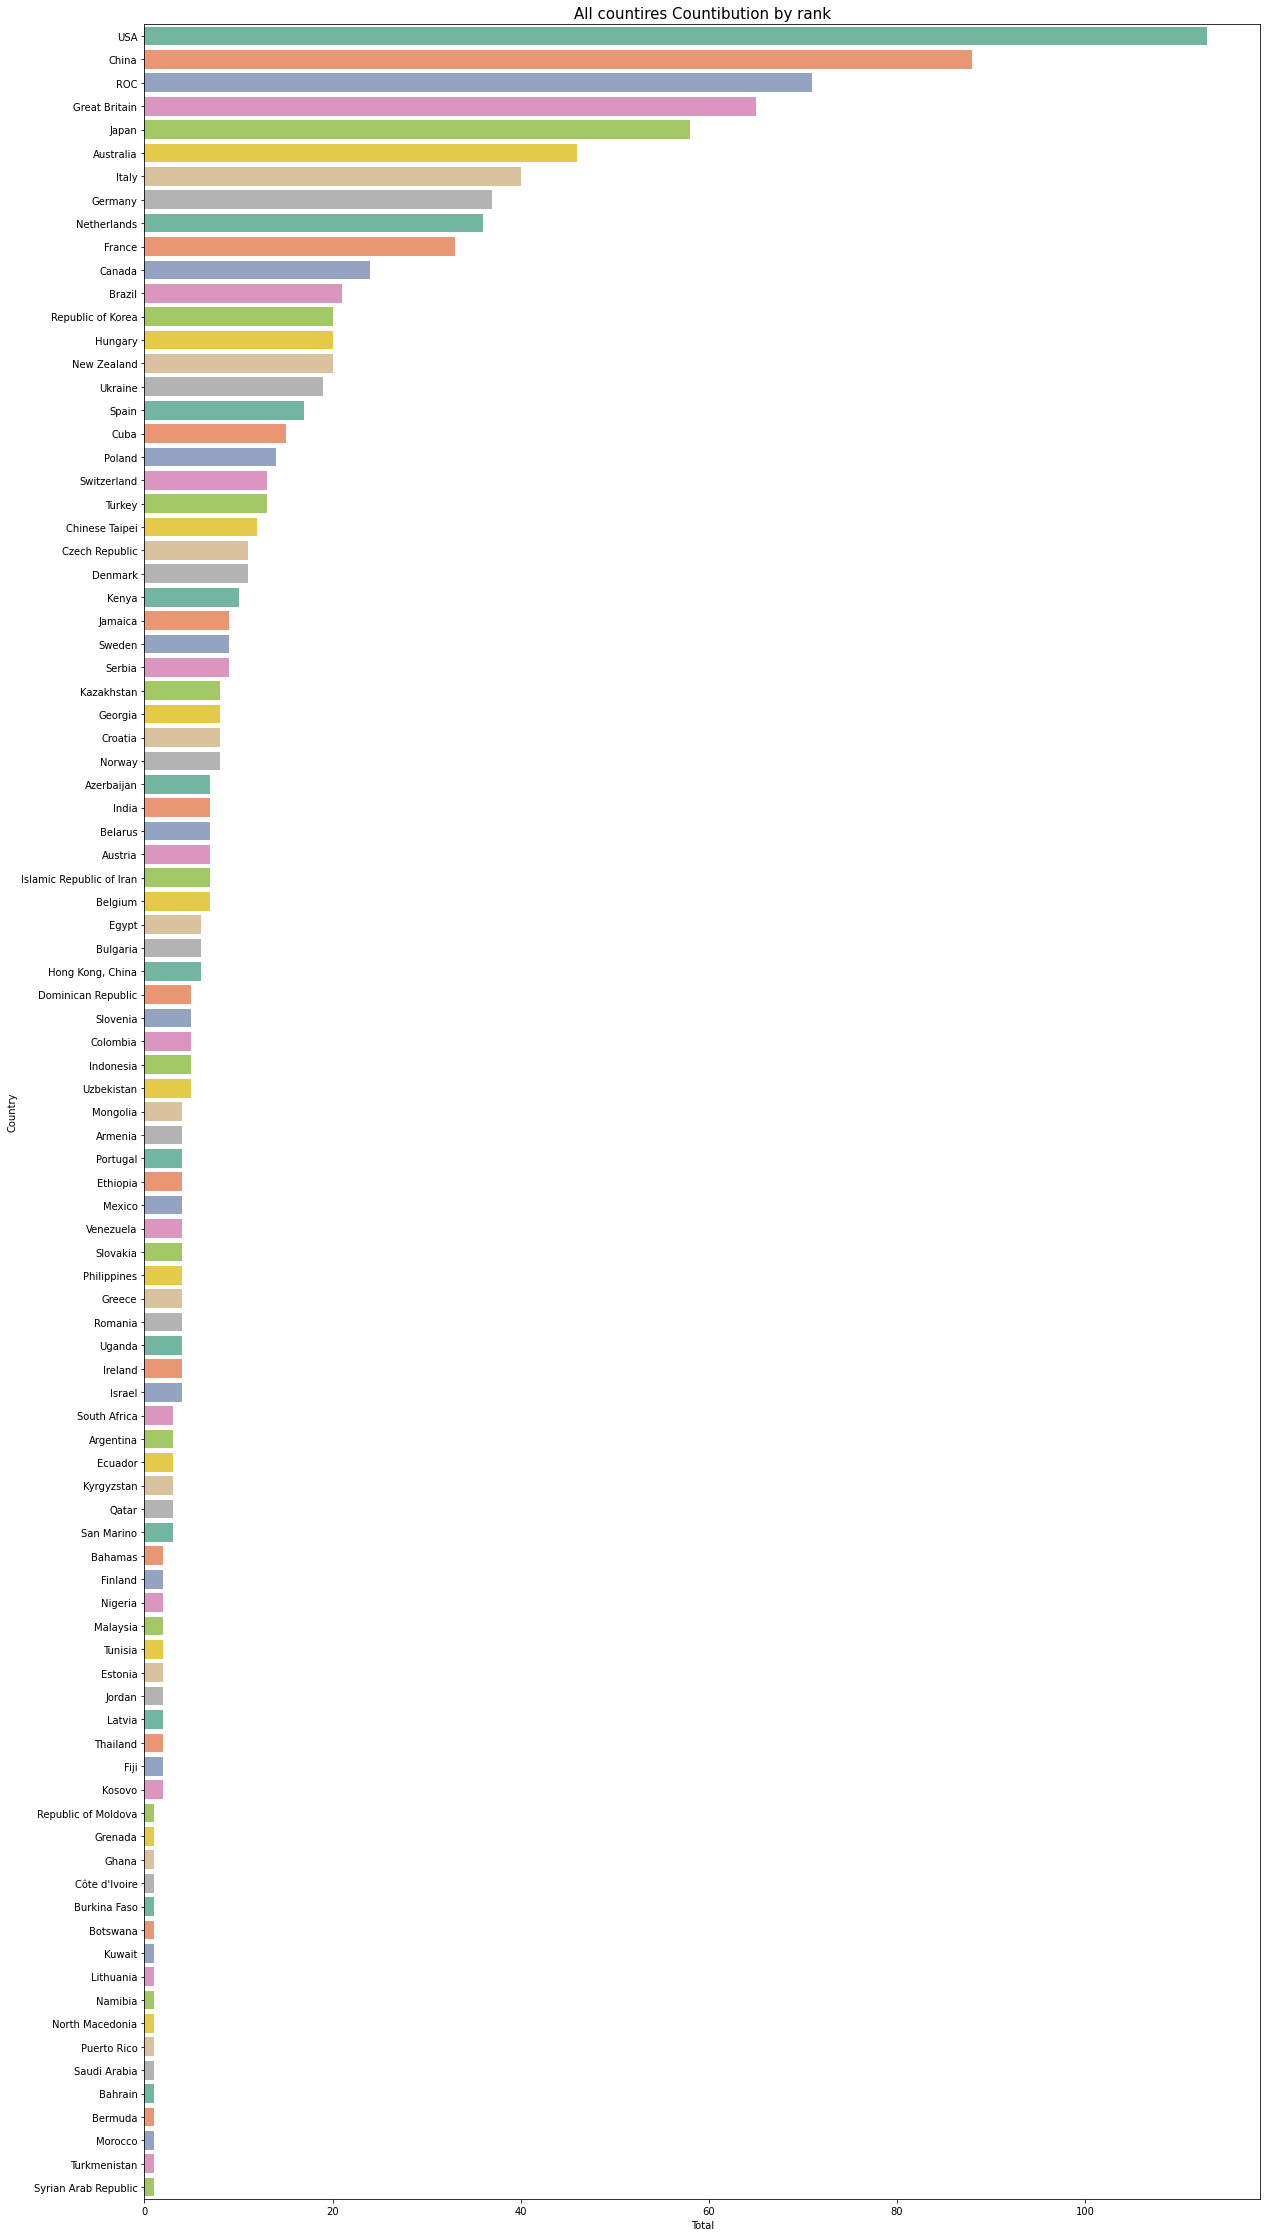

In [14]:
#Winners distibution
plt.figure(figsize=(20,40))
plt.tight_layout()
sns.barplot(x='Total', y='Country', data=dataset, palette='Set2')
plt.title('All countires Countibution by rank', fontsize=15)
plt.show()

In [17]:
#Medal distribution
medals=dataset[['Gold Medal', 'Silver Medal', 'Bronze Medal']]
count_data=[]
for i in medals.columns:
    count_data.append([i,medals[i].sum()])
medals=pd.DataFrame(count_data, columns=['Medals', 'Total']).set_index('Medals').reset_index()
medals['Percent']=round(((medals['Total']/medals['Total'].sum())*100), 2)
medals

,Medals,Total,Percent
0,Gold Medal,340,31.48
1,Silver Medal,338,31.30
2,Bronze Medal,402,37.22


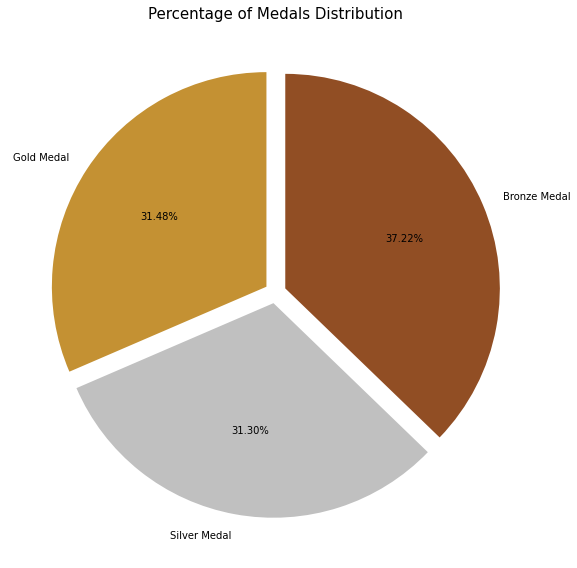

In [18]:
df=medals['Percent']
plt.figure(figsize=(12, 8))
color=['#C49133', '#C0C0C0', '#914E24']
label=medals['Medals']
plt.pie(df , labels=label, autopct='%1.2f%%', colors=color, explode=[0.05]*3, startangle=90)
plt.title('Percentage of Medals Distribution', fontsize=15)
plt.tight_layout()
plt.show()

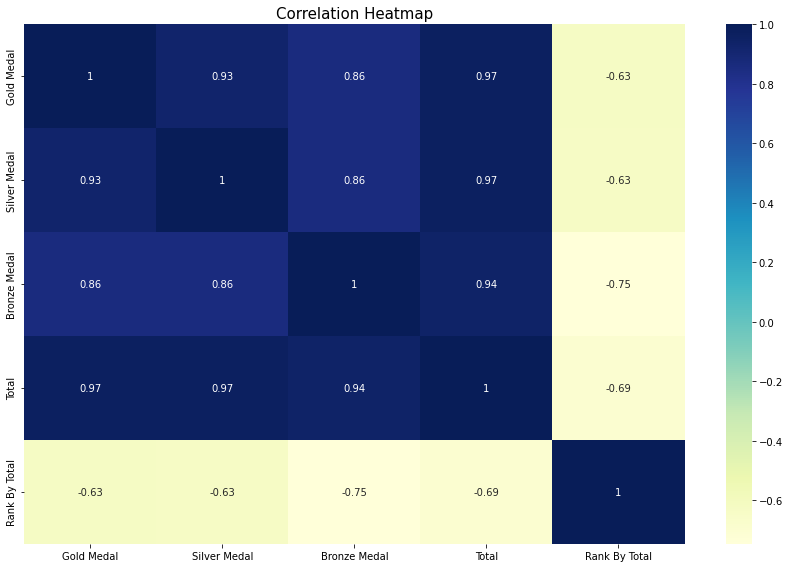

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap', fontsize=15)
plt.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

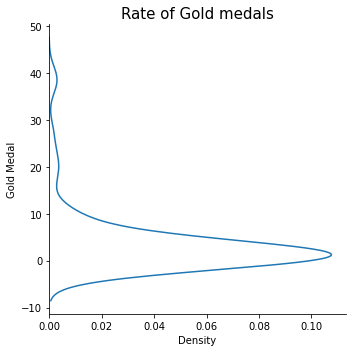

In [20]:
#rate of Gold medals
yaxis=np.arange(10)
plt.figure(figsize=(12, 8))
sns.displot(data=dataset, y='Gold Medal', kind='kde')
plt.title('Rate of Gold medals', fontsize=15)
plt.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

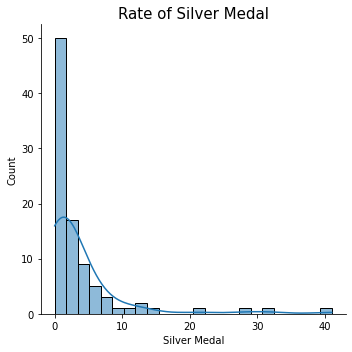

In [22]:
#rate of Silver medals
yaxis=np.arange(10)
plt.figure(figsize=(12, 8))
sns.displot(data=dataset, x='Silver Medal', kde=True)
plt.title('Rate of Silver Medal', fontsize=15)
plt.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

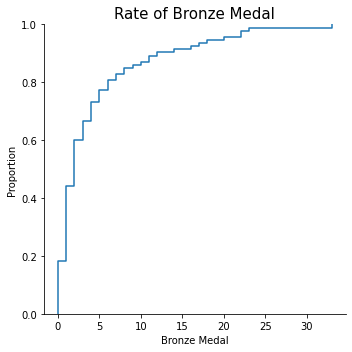

In [23]:
#rate of Bronze medals
yaxis=np.arange(10)
plt.figure(figsize=(12, 8))
sns.displot(data=dataset, x='Bronze Medal', kind='ecdf')
plt.title('Rate of Bronze Medal', fontsize=15)
plt.tight_layout()
plt.show()